In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models


c:\Users\George.LAPTOP-PQ2658L0\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


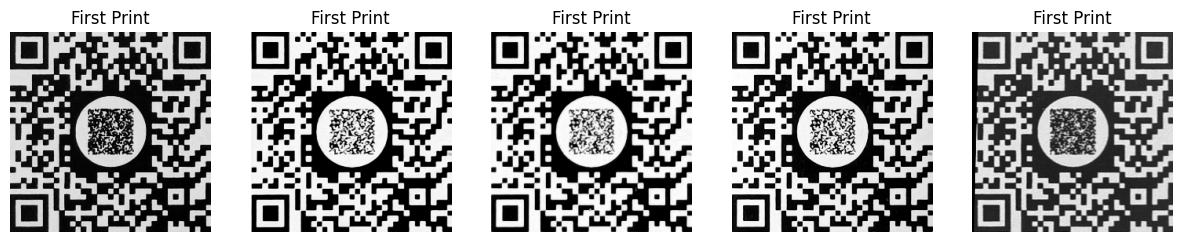

In [15]:
# Define a fixed image size
IMG_SIZE = (256, 256)  # Change as needed

# Define dataset paths
dataset_path = "QR Data"

# Load images
def load_images(folder):
    images = []
    labels = []
    for label in ["First Print", "Second Print"]:  # Assuming these subfolders exist
        path = os.path.join(folder, label)
        for file in os.listdir(path):
            img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                images.append(img)
                labels.append(0 if label == "First Print" else 1)  # 0 = Original, 1 = Counterfeit
    return np.array(images), np.array(labels)

images, labels = load_images(dataset_path)

# Display some sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title("First Print" if labels[i] == 0 else "Second Print")
    axes[i].axis('off')
plt.show()


In [16]:
# Feature extraction functions
def extract_features(images):
    feature_vectors = []
    for img in images:
        # Global Features
        hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
        edges = cv2.Canny(img, 100, 200).flatten()
        
        # Local Features (QR Texture Variations)
        laplacian = cv2.Laplacian(img, cv2.CV_64F).var()
        
        # Combine features
        feature_vector = np.hstack((hist, edges, [laplacian]))
        feature_vectors.append(feature_vector)
    
    return np.array(feature_vectors)

features = extract_features(images)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


Random Forest Model Performance:
Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



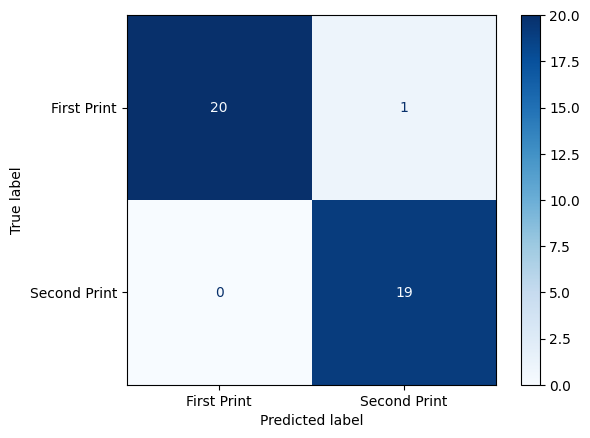

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Train a traditional ML classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Flatten images for Random Forest

# Make predictions
y_pred_rf = clf.predict(X_test.reshape(X_test.shape[0], -1))

# Print Evaluation Metrics
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["First Print", "Second Print"])
disp_rf.plot(cmap="Blues")

Random Forest Model Performance:
Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



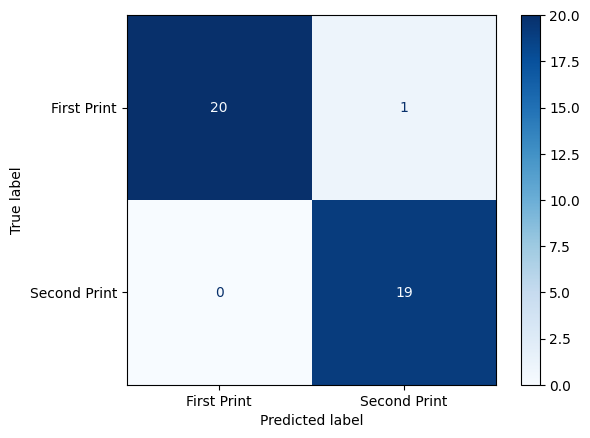

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Train a traditional ML classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Flatten images for Random Forest

# Make predictions
y_pred_rf = clf.predict(X_test.reshape(X_test.shape[0], -1))

# Print Evaluation Metrics
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["First Print", "Second Print"])
disp_rf.plot(cmap="Blues")

Train Shape: (160, 256, 256, 1), Test Shape: (40, 256, 256, 1)


c:\Users\George.LAPTOP-PQ2658L0\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 553ms/step - accuracy: 0.5570 - loss: 282.5716 - val_accuracy: 0.6500 - val_loss: 0.4844
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 478ms/step - accuracy: 0.6740 - loss: 0.7273 - val_accuracy: 0.5750 - val_loss: 0.6299
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 534ms/step - accuracy: 0.7012 - loss: 0.5571 - val_accuracy: 0.6250 - val_loss: 0.7024
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 544ms/step - accuracy: 0.7986 - loss: 0.4456 - val_accuracy: 0.8000 - val_loss: 0.3170
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 562ms/step - accuracy: 0.8435 - loss: 0.3030 - val_accuracy: 0.9250 - val_loss: 0.1672
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 514ms/step - accuracy: 0.8789 - loss: 0.2613 - val_accuracy: 0.8500 - val_loss: 0.1837
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 548ms/step - accuracy: 0.8652 - loss: 0.2979 - val_accuracy: 0.7500 - val_loss: 0.4914
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 522ms/step - accuracy: 0.8617 - loss: 0.3574 - val_accuracy: 

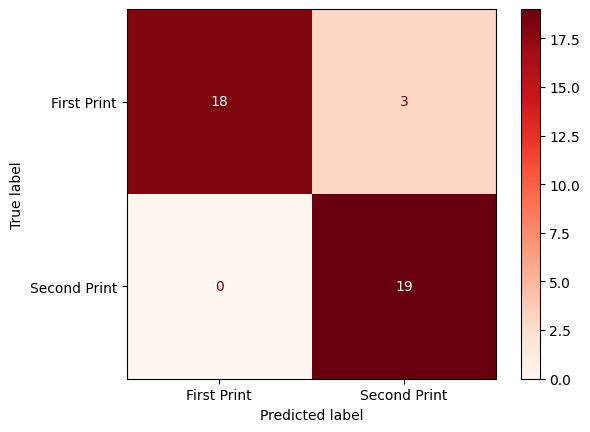

In [18]:
# Ensure correct reshaping for CNN
images = images.reshape(-1, 256, 256, 1)  # (num_samples, height, width, channels)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

# Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevents overfitting
    layers.Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=16, 
    validation_data=(X_test, y_test),
    callbacks=[early_stop]  # Stop if no improvement
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("CNN Model Accuracy:", test_acc)

# Make predictions on test set
y_pred_cnn_prob = model.predict(X_test)  # Returns probabilities
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int).flatten()  # Convert to binary labels

# Print Evaluation Metrics
print("CNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_cnn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cnn))

# Confusion Matrix
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=["First Print", "Second Print"])
disp_cnn.plot(cmap="Reds")

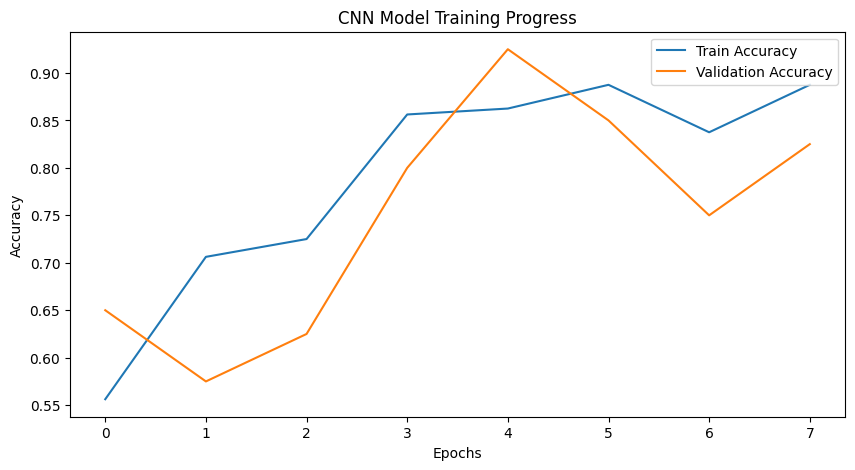

In [19]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model Training Progress')
plt.show()

C:\Users\George.LAPTOP-PQ2658L0\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


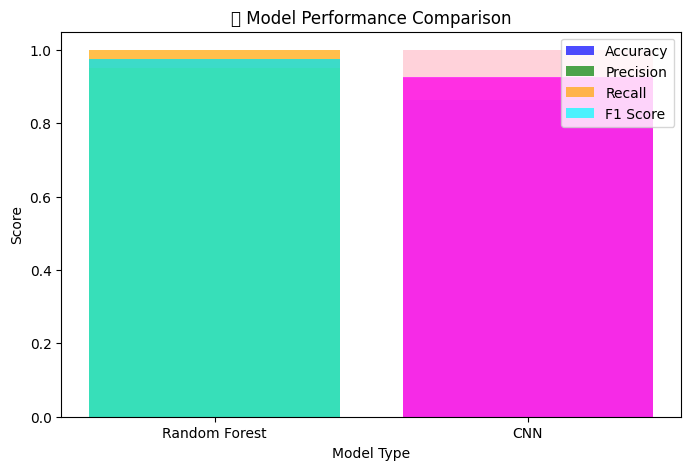

In [ ]:
import matplotlib.pyplot as plt

# Extract evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

models = ["Random Forest", "CNN"]
accuracy = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_cnn),
]
precision = [
    precision_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_cnn),
]
recall = [
    recall_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_cnn),
]
f1 = [
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_cnn),
]

# Plot Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=['blue', 'red'], alpha=0.7, label="Accuracy")
plt.bar(models, precision, color=['green', 'purple'], alpha=0.7, label="Precision")
plt.bar(models, recall, color=['orange', 'pink'], alpha=0.7, label="Recall")
plt.bar(models, f1, color=['cyan', 'magenta'], alpha=0.7, label="F1 Score")
plt.xlabel("Model Type")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()


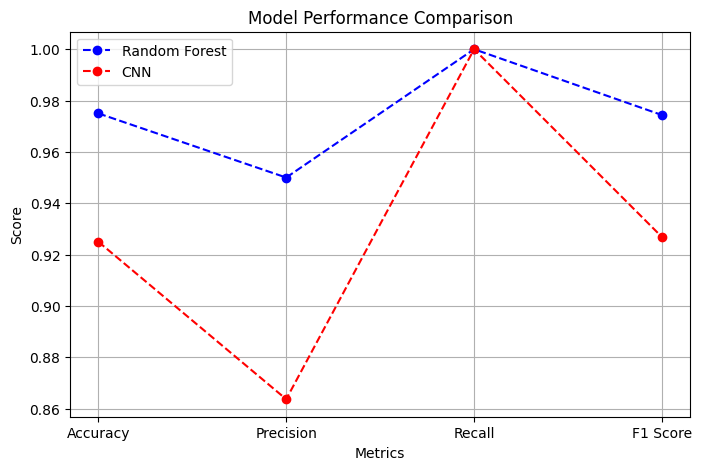

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create a metric comparison plot
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
rf_scores = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)]
cnn_scores = [accuracy_score(y_test, y_pred_cnn), precision_score(y_test, y_pred_cnn), recall_score(y_test, y_pred_cnn), f1_score(y_test, y_pred_cnn)]

# Line plot for model performance
plt.figure(figsize=(8, 5))
plt.plot(metrics, rf_scores, marker='o', label="Random Forest", linestyle='dashed', color='blue')
plt.plot(metrics, cnn_scores, marker='o', label="CNN", linestyle='dashed', color='red')

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()

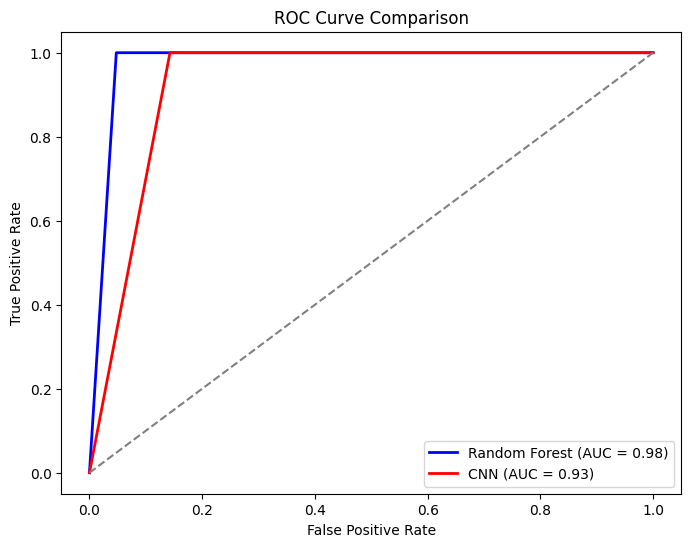

In [22]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='red', lw=2, label=f'CNN (AUC = {roc_auc_cnn:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='dashed')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


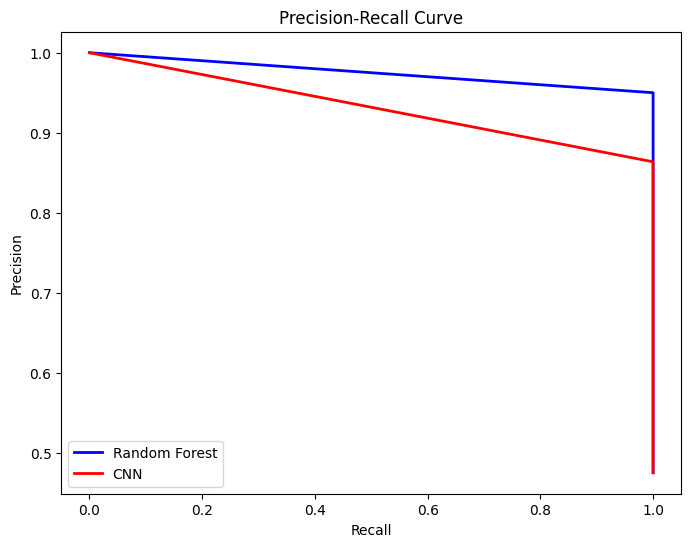

In [23]:
from sklearn.metrics import precision_recall_curve

# Compute PR curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)

# Compute PR curve for CNN
precision_cnn, recall_cnn, _ = precision_recall_curve(y_test, y_pred_cnn)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label="Random Forest")
plt.plot(recall_cnn, precision_cnn, color='red', lw=2, label="CNN")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
import cv2
import numpy as np

def predict_qr(image_path, rf_model, cnn_model):
    """
    Predict if a QR code is 'First Print' (Original) or 'Second Print' (Counterfeit).
    
    Parameters:
        image_path (str): Path to the input QR code image.
        rf_model (RandomForestClassifier): Trained Random Forest model.
        cnn_model (tensorflow.keras.models.Model): Trained CNN model.
    
    Returns:
        None: Prints the predictions.
    """
    IMG_SIZE = (256, 256)  # Ensure consistent image size

    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    img_resized = cv2.resize(img, IMG_SIZE) 
    img_normalized = img_resized / 255.0  # Normalize pixel values (0-1)

    # Reshape for CNN (adding batch dimension)
    img_cnn = img_normalized.reshape(1, 256, 256, 1)  # Shape: (1, 256, 256, 1)


    num_features = rf_model.n_features_in_ 
    img_rf = img_normalized.flatten().reshape(1, -1)  

    if img_rf.shape[1] < num_features:
        padding = np.zeros((1, num_features - img_rf.shape[1]))
        img_rf = np.hstack((img_rf, padding))  # Pad to match expected features

    rf_pred = rf_model.predict(img_rf)[0]  # Random Forest Prediction
    cnn_pred_prob = cnn_model.predict(img_cnn)[0][0]  # CNN Prediction (probability)
    cnn_pred = 1 if cnn_pred_prob > 0.5 else 0  # Convert probability to class

  
    label_map = {0: "First Print (Original)", 1: "Second Print (Counterfeit)"}
    print(f"Random Forest Prediction: {label_map[rf_pred]}")
    print(f"CNN Prediction: {label_map[cnn_pred]} (Confidence: {cnn_pred_prob:.4f})")

    import matplotlib.pyplot as plt
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Prediction: {label_map[cnn_pred]}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\George.LAPTOP-PQ2658L0\AppData\Local\Temp\ipykernel_25968\1110544368.py:2: SyntaxWarning: invalid escape sequence '\F'
  random_image_path = "QR Data\First Print\input_image_active (4).png"


📌 Random Forest Prediction: Second Print (Counterfeit)
📌 CNN Prediction: First Print (Original) (Confidence: 0.4938)


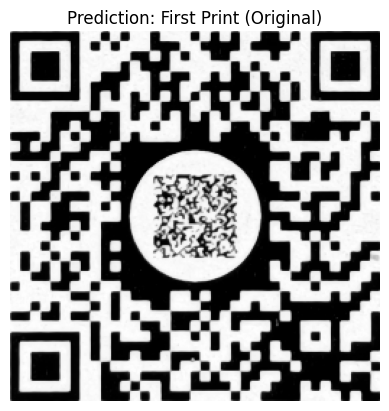

In [29]:
# Example random image path (Replace with actual path)
random_image_path = "QR Data\First Print\input_image_active (4).png"

# Call prediction function
predict_qr(random_image_path, clf, model)  # clf = Random Forest model, model = CNN model
